<h1 style="background-color:Red"></h1>

<h1>Titanic Surival Prediction</h1>

<h4>Data Loading</h4>

In [1]:
import pandas as pd

In [2]:
data=pd.read_csv(r"C:\Users\midla\Downloads\Titanic-Dataset.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [5]:
data.duplicated().sum()

0

In [6]:
print("No.Of Rows=",data.shape[0])

No.Of Rows= 891


In [7]:
print("No.Of Column=",data.shape[1])

No.Of Column= 12


<h4>Data Cleaning</h4>

In [8]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
per=data.isnull().sum()/len(data)*100
per

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

<h6>77% of cabin data is null values,its better to ignore or remove Cabin column, for better result fill null age with median age ,we can fill embarked with mod values </h6>

<h4>HeatMap of Null values</h4>

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'HeatMap of Null Values')

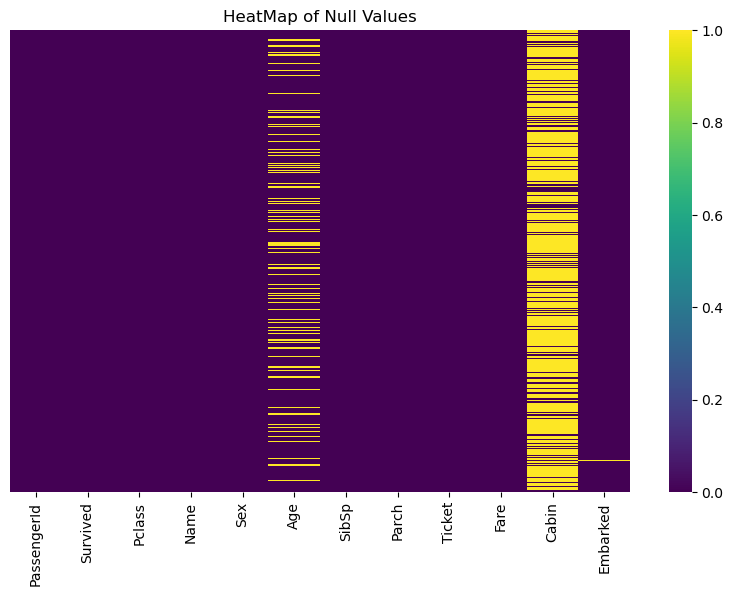

In [11]:
plt.figure(figsize=(10,6))
sns.heatmap(data.isnull(),cmap='viridis',yticklabels=False)
plt.title("HeatMap of Null Values")


In [12]:
data=data.drop(['Cabin'],axis=1)

In [13]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [14]:
data['Age']=data['Age'].fillna(data['Age'].median())

In [15]:
data['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [16]:
data['Embarked']=data['Embarked'].fillna(data['Embarked'].mode()[0])

In [17]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### HeatMap of Null Values After Cleaning

Text(0.5, 1.0, 'HeatMap of Null Values')

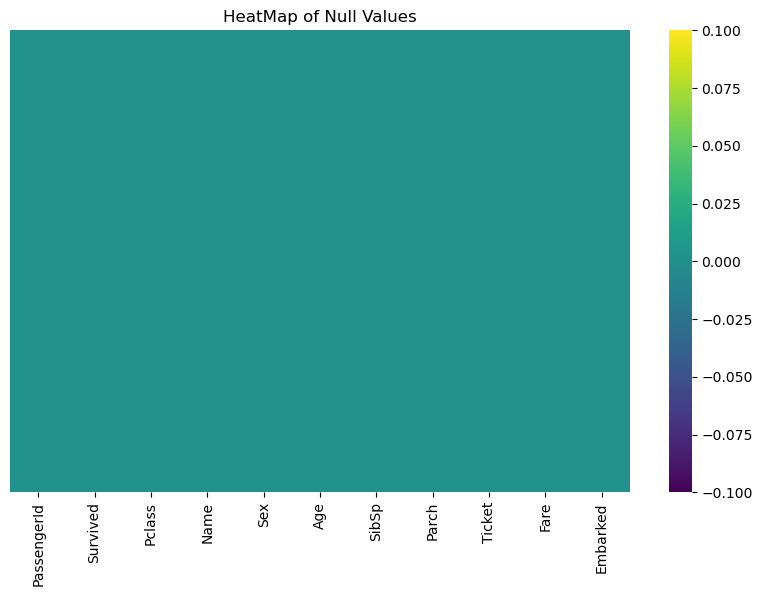

In [18]:
plt.figure(figsize=(10,6))
sns.heatmap(data.isnull(),cmap='viridis',yticklabels=False)
plt.title("HeatMap of Null Values")


<h2 style="background-color:Green"></h2>

<h3>EDA</h3>

In [19]:
corr=data.corr(numeric_only=True)
corr

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.034212,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500
Age,0.034212,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688
SibSp,-0.057527,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000


### Correlation HeatMap

<Axes: >

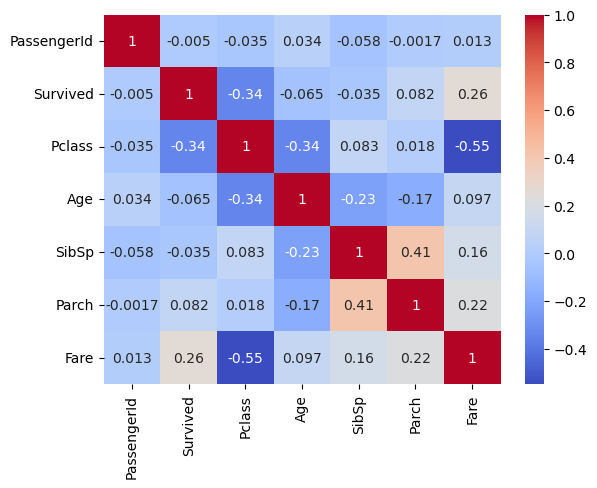

In [20]:
sns.heatmap(corr ,cmap='coolwarm',annot=True)

>From the correlation heatmap, we can conclude that passenger class and fare had the strongest influence on survival. A higher fare was positively correlated with survival, suggesting that wealthier passengers traveling in higher classes had better chances of surviving.Age showed only a weak negative relationship with survival, indicating that being older slightly reduced the chances of survival, but not significantly.. Overall, Pclass and Fare stand out as the most important features for predicting survival, while other variables had limited influence.

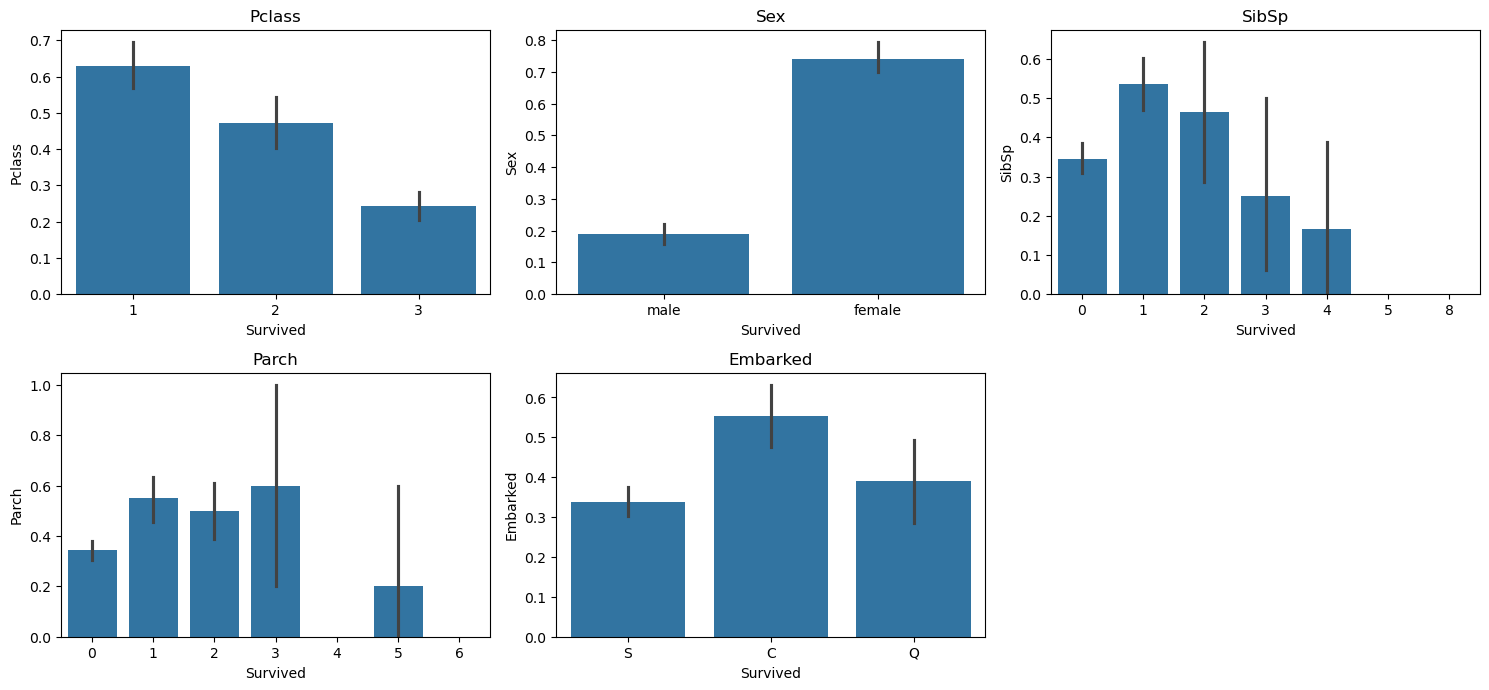

In [21]:
fet=['Pclass','Sex','SibSp','Parch','Embarked']
plt.figure(figsize=(15,10))  

for i, par in enumerate(fet, 1):
    plt.subplot(3, 3, i)  
    sns.barplot(data=data,x=par,y='Survived')
    plt.title(par)
    plt.xlabel('Survived')
    plt.ylabel(par)
    plt.xticks()

plt.tight_layout()
plt.show()

>Analysis of the Titanic dataset shows that passengers who paid higher fares, were 1st class, female, or boarded from Cherbourg had the highest survival rates, highlighting the influence of socio-economic status, gender, and boarding location. In contrast, passengers with siblings/spouses aboard (SibSp > 0) or more parents/children aboard (Parch > 1) had lower survival rates, suggesting that larger family groups faced greater challenges during evacuation. Overall, survival depended on a combination of fare, class, gender, boarding port, and family size, rather than any single feature alone.


In [22]:
def age_group(age):
    if age < 18:
        return 'Child'
    elif age >= 18 and age < 60:
        return 'Adult'
    else:
        return 'Senior'

data['AgeGroup'] = data['Age'].apply(age_group)


<Axes: xlabel='AgeGroup', ylabel='Survived'>

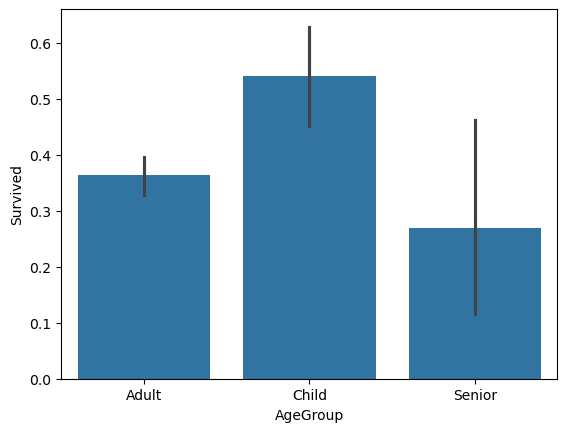

In [23]:
 sns.barplot(data=data,x='AgeGroup',y='Survived')

>Categorizing by age in the Titanic dataset, children (<18) had the highest survival rates, adults (<60) had moderate survival, and seniors (≥60) had the lowest survival, indicating that age was an important factor influencing survival outcomes.

<h3>Data Preprocessing</h3>

In [24]:
data.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'AgeGroup'],
      dtype='object')

In [25]:
from sklearn.preprocessing import LabelEncoder

In [26]:
le=LabelEncoder()
data['Sex']=le.fit_transform(data['Sex'])

In [27]:
for i,label in enumerate(le.classes_):
     print(f"{label}:{i}")

female:0
male:1


In [28]:
data['Embarked']=le.fit_transform(data['Embarked'])

In [29]:
for i,label in enumerate(le.classes_):
    print(f"{label}:{i}")

C:0
Q:1
S:2


In [30]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2,Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0,Adult
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,Adult
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2,Adult


<h3>Model Building,Cross Validation & Evaluation</h3>

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

In [32]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'AgeGroup'],
      dtype='object')

In [42]:
numeric_data=[ 'Pclass', 'Sex','Age', 'SibSp','Parch','Fare', 'Embarked']
x=data[numeric_data]
y=data['Survived']
model=RandomForestClassifier(n_estimators=100,random_state=42)
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.2,random_state=42)
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.80      0.85      0.82       436
           1       0.73      0.67      0.70       277

    accuracy                           0.78       713
   macro avg       0.77      0.76      0.76       713
weighted avg       0.77      0.78      0.77       713



In [34]:
model1=LogisticRegression()
model1.fit(xtrain,ytrain)
ypred2=model1.predict(xtest)
print(classification_report(ytest,ypred2))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       436
           1       0.79      0.66      0.72       277

    accuracy                           0.80       713
   macro avg       0.80      0.77      0.78       713
weighted avg       0.80      0.80      0.80       713



In [35]:
sample=xtest.iloc[0:1]
sample

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
709,3,1,28.0,1,1,15.2458,0


In [36]:
model1.predict(sample)

array([0], dtype=int64)

In [37]:
model.predict(sample)

array([0], dtype=int64)

In [38]:
pred=[[1,1,64,1,1,24.6,0]]
model.predict(pred)

array([0], dtype=int64)

In [39]:
model1.predict(pred)

array([0], dtype=int64)

<h4 style="background-color:red">The RandomForestClassifier achieved 78% accuracy, performing well for non-survivors (precision 0.80, recall 0.85, F1 0.82) but weaker for survivors (precision 0.74, recall 0.67, F1 0.70), showing a slight bias toward predicting non-survivors. LogisticRegression performed slightly better with 80% accuracy, higher macro and weighted averages, and stronger non-survivor recall (0.89) while maintaining similar survivor recall (0.66). Overall, LogisticRegression offers a more balanced and accurate model, though both still underperform in identifying survivors compared to non-survivors.</h4>

[]

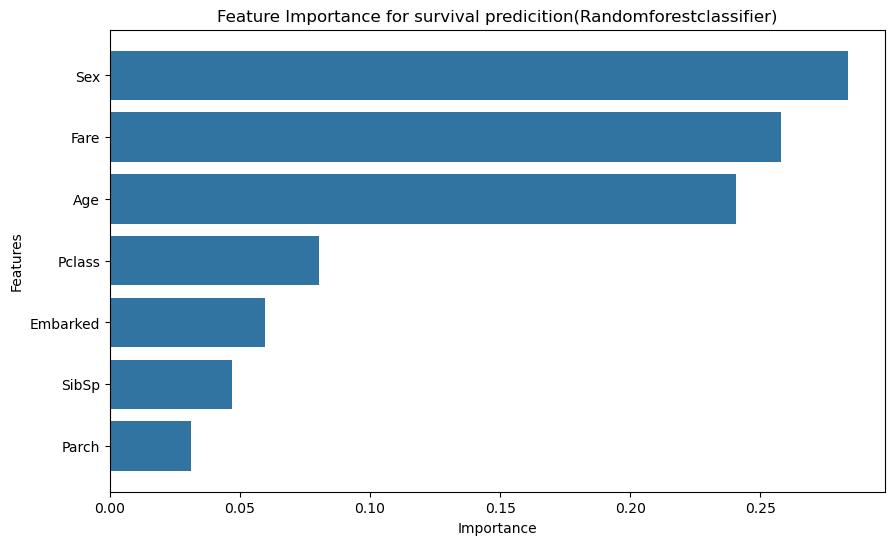

In [43]:
fetimpo=pd.DataFrame({ 'Features':numeric_data ,'Importance':model.feature_importances_ })
fetimpo=fetimpo.sort_values('Importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Features', data=fetimpo)
plt.title('Feature Importance for survival predicition(Randomforestclassifier)')
plt.plot()

[]

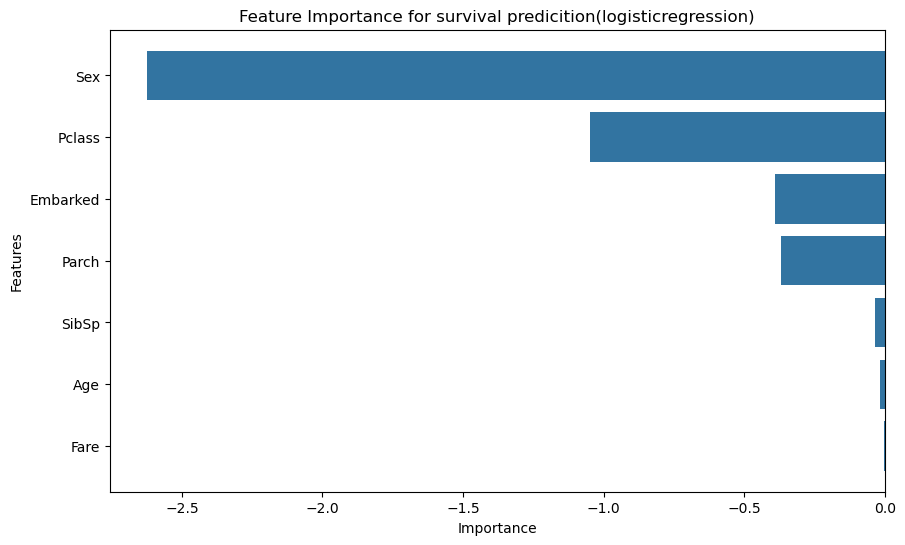

In [46]:
fetimpo=pd.DataFrame({ 'Features':numeric_data ,'Importance':model1.coef_[0] })
fetimpo = fetimpo.reindex(fetimpo.Importance.abs().sort_values(ascending=False).index)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Features', data=fetimpo)
plt.title('Feature Importance for survival predicition(logisticregression)')
plt.plot()

<h4 style="background-color:Red">The Titanic survival prediction project demonstrates how different machine learning models perform on imbalanced real-world data. Exploratory analysis revealed that survival was strongly influenced by socio-demographic and travel-related factors—females, children, first-class passengers, and those embarked from Cherbourg had higher survival rates, while males, seniors, and those with more family aboard had lower survival chances. Feature engineering (like grouping age into child/adult/senior) improved interpretability. Among models tested, Logistic Regression (80% accuracy) slightly outperformed RandomForest (78% accuracy), offering better balance across classes, though both still struggled with correctly identifying survivors compared to non-survivors. Feature importance analysis highlighted sex, class, and fare as the most decisive predictors. Overall, the project shows the value of combining data analysis with classification models to uncover historical survival patterns and evaluate predictive accuracy.</h4>